# Задание: Центральная предельная теорема своими руками


В данном ноутбуке рассматривается Гамма-распределение с параметром а = 2 (частный случай - распределение Эрланга)
http://www.statistica.ru/theory/gamma-raspredelenie/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import norm
%matplotlib inline

Генерируем случайную выборку, строим гистограмму и график плотности распределения.

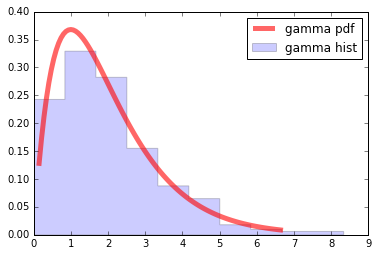

In [2]:
a = 2
r = gamma.rvs(a, size=1000)

fig, ax = plt.subplots(1, 1)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2, label='gamma hist')
ax.legend(loc='best', frameon=False)

x = np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.legend(loc='best')

Среднее и дисперсия для данного случая (alpha = 1), считаются так M = a, D = a

In [3]:
mean, var = gamma.stats(a, moments='mv')

Зададим функцию, для заданного n генерирующую выборку из тысячи выборочных средних, строящую гистограмму и 
график приближения нормальным распределением с математическим ожиданием таким же, как и у исходного распределения и
дисперсией в n раз меньше.

In [4]:
def plot_means(n):
    vals = np.array([gamma.rvs(a, size=n).mean() for i in range(1000)])
    fig, ax = plt.subplots(1, 1)
    ax.hist(vals, normed=True, histtype='stepfilled', alpha=0.2, label='n = {}'.format(n))
    ax.legend(loc='best', frameon=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('namber of samples')
    norm_rv = norm(mean, np.sqrt(float(var)/n))
    x = np.linspace(0,5,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='means PDF')
    ax.legend(loc='best', frameon=False)

Вызовем данную функцию для разных значений n.

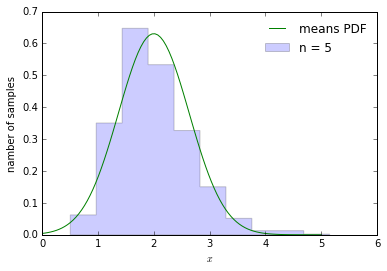

In [5]:
plot_means(5)

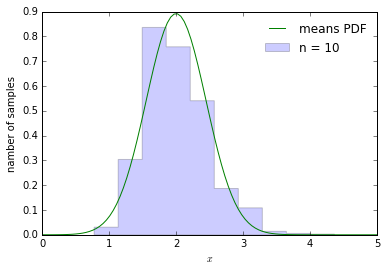

In [6]:
plot_means(10)

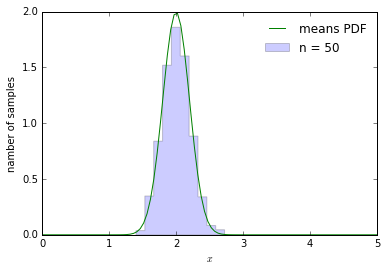

In [7]:
plot_means(50)

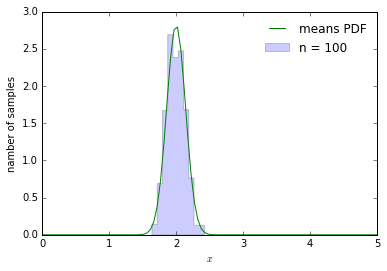

In [8]:
plot_means(100)

## Выводы

Действительно, можно видеть, что с ростом n гистограмма становится более узкой, т. е. разброс значений уменьшается,
при этом точность ее приближения нормальным распределением с ростом n увеличивается, что совпадает с теорией.